/Users/ganguly93/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


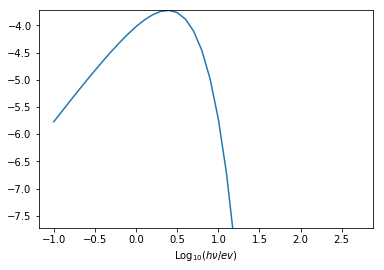

In [44]:

import numpy as np
from matplotlib import pyplot as p

hcont=6.625e-27
ccont=3.e10
kcont=1.381e-16
rcont=8.314472e7
Gcont=6.67e-8
Msun=1.989e33
Lsun=3.827e33
rsun=6.96e10
yr=365.*24.*3600
pi=3.1415926
au=1.49598e13
pc=3.085678e18
ev=1.6022e-12

def BlackbodyBnu(Temperature, nu):
    return 2.*hcont*nu**3/ccont**2/(np.exp(hcont*nu/kcont/Temperature)-1)

hnu=10.**np.arange(-1,4,0.1)*ev 

# white dwarf a single blackbody at 1e4 K

Bnu=np.array(hnu.size)
Temperature=1.e4

Bnu=BlackbodyBnu(Temperature,hnu/hcont)

p.plot(np.log10(hnu/ev),np.log10(Bnu))
p.ylim(np.log10(Bnu.max())-4.,np.log10(Bnu.max()))
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.show()

/Users/ganguly93/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/ganguly93/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


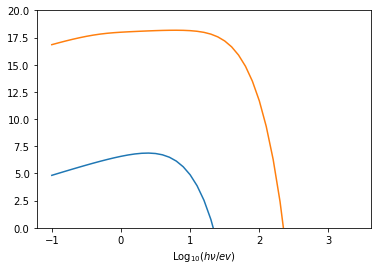

In [45]:
SED = np.pi*Bnu*4*np.pi* 1e9
p.plot(np.log10(hnu/ev),np.log10(SED))
p.ylim(0.,20.)
#p.ylim(np.log10(SED.max())-4.,np.log10(SED.max()))
p.xlabel(r'Log$_{10}(h\nu/ev)$')
#p.show()
dr = (100*1e9 - 1e9)/99
SED0 = []
m = 0
def T(r):
    return ((Gcont*Msun*1e-9*Msun/yr/8/np.pi/5.67e-5)**0.25)*(r**-0.75)
for j in range(50):
    S = 0
    for i in range(100):
        r = 1e9 + i*dr
        temp = T(r)
        Bnu=np.array(hnu.size)
        Bnu=BlackbodyBnu(temp,hnu[j]/hcont)
        S += 2*np.pi*Bnu*2*np.pi*r*dr
    SED0.append(S)
m = np.max(SED0)
p.plot(np.log10(hnu/ev),np.log10(SED0))

#p.ylim(np.log10(m)-4.,np.log10(m))
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.show()